## Time Series Analysis SARIMA Model

In [71]:
#Import the necessary libraries and modules
import numpy as np
import pandas as pd
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [139]:
#Reading the datatset
data = pd.read_csv(r"C:\LTC-USD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,273.108002,289.510986,272.261993,286.503998,286.503998,842993024
1,2017-12-27,286.588989,290.944000,264.423004,272.174011,272.174011,777137984
2,2017-12-28,272.126007,273.177002,231.376999,249.929993,249.929993,2593240064
3,2017-12-29,250.352005,258.040985,238.332993,245.501999,245.501999,1392210048
4,2017-12-30,245.087006,245.432999,208.197006,218.962997,218.962997,943667008
...,...,...,...,...,...,...,...
1822,2022-12-22,65.399422,66.514549,64.517052,66.151672,66.151672,368489876
1823,2022-12-23,66.152802,66.596397,65.450348,65.772224,65.772224,306694378
1824,2022-12-24,65.772232,66.012245,65.263176,65.774788,65.774788,178396939
1825,2022-12-25,65.774750,69.363144,65.540604,69.206268,69.206268,335124962


## Explanatory Data Analysis

In [140]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1827.0,1.002235e+02,6.193164e+01,2.346288e+01,5.370077e+01,7.507401e+01,1.374756e+02,3.878692e+02
High,1827.0,1.039533e+02,6.521786e+01,2.375446e+01,5.527700e+01,7.744202e+01,1.426072e+02,4.129601e+02
Low,1827.0,9.602568e+01,5.814380e+01,2.282478e+01,5.227002e+01,7.284620e+01,1.326155e+02,3.452988e+02
Close,1827.0,1.000912e+02,6.177052e+01,2.346433e+01,5.366026e+01,7.513308e+01,1.373212e+02,3.864508e+02
Adj Close,1827.0,1.000912e+02,6.177052e+01,2.346433e+01,5.366026e+01,7.513308e+01,1.373212e+02,3.864508e+02
Volume,1827.0,2.400920e+09,2.426152e+09,1.783969e+08,5.734155e+08,1.787881e+09,3.260287e+09,1.799426e+10


In [141]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [142]:
data.corr

<bound method DataFrame.corr of             Date        Open        High         Low       Close   Adj Close  \
0     2017-12-26  273.108002  289.510986  272.261993  286.503998  286.503998   
1     2017-12-27  286.588989  290.944000  264.423004  272.174011  272.174011   
2     2017-12-28  272.126007  273.177002  231.376999  249.929993  249.929993   
3     2017-12-29  250.352005  258.040985  238.332993  245.501999  245.501999   
4     2017-12-30  245.087006  245.432999  208.197006  218.962997  218.962997   
...          ...         ...         ...         ...         ...         ...   
1822  2022-12-22   65.399422   66.514549   64.517052   66.151672   66.151672   
1823  2022-12-23   66.152802   66.596397   65.450348   65.772224   65.772224   
1824  2022-12-24   65.772232   66.012245   65.263176   65.774788   65.774788   
1825  2022-12-25   65.774750   69.363144   65.540604   69.206268   69.206268   
1826  2022-12-26   69.206825   70.834938   68.710892   70.684746   70.684746   

       

In [143]:
data2 = data.copy()

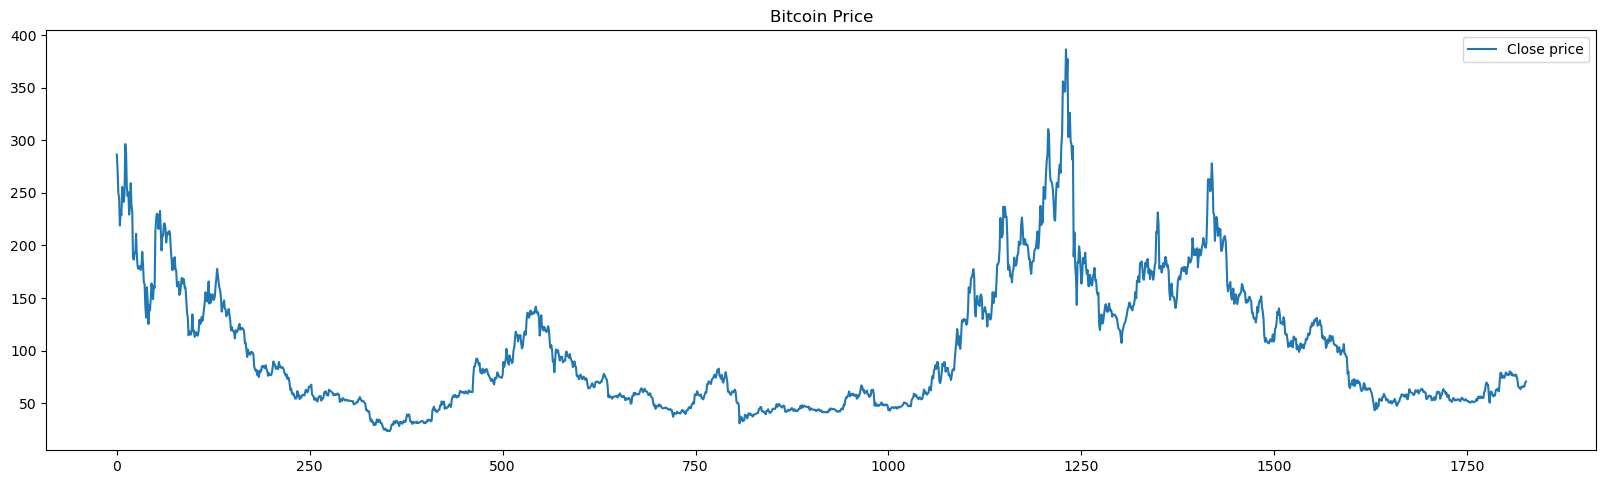

In [144]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Bitcoin Price')
plt.plot(data.Close,label='Close price')
plt.legend()

## Data Visualization

**Since we are particularly interested in the close price and date variable from the dataset, so we'll just copy these two variables into a new dataset**

In [145]:
df = data[['Date', 'Close']]
df

,Date,Close
0,2017-12-26,286.503998
1,2017-12-27,272.174011
2,2017-12-28,249.929993
3,2017-12-29,245.501999
4,2017-12-30,218.962997
...,...,...
1822,2022-12-22,66.151672
1823,2022-12-23,65.772224
1824,2022-12-24,65.774788
1825,2022-12-25,69.206268


**We need to group data for better understanding to it is advised to convert Date column into 'Datetime' type and extract needful information.**

In [146]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.dtypes

Date     datetime64[ns]
Close           float64
Year              int64
Month             int64
dtype: object

In [147]:
df1= df.groupby(['Date'])['Close'].mean()
print(df1.head(10))

Date
2017-12-26    286.503998
2017-12-27    272.174011
2017-12-28    249.929993
2017-12-29    245.501999
2017-12-30    218.962997
2017-12-31    232.095993
2018-01-01    229.033005
2018-01-02    255.684006
2018-01-03    245.367996
2018-01-04    241.369995
Name: Close, dtype: float64


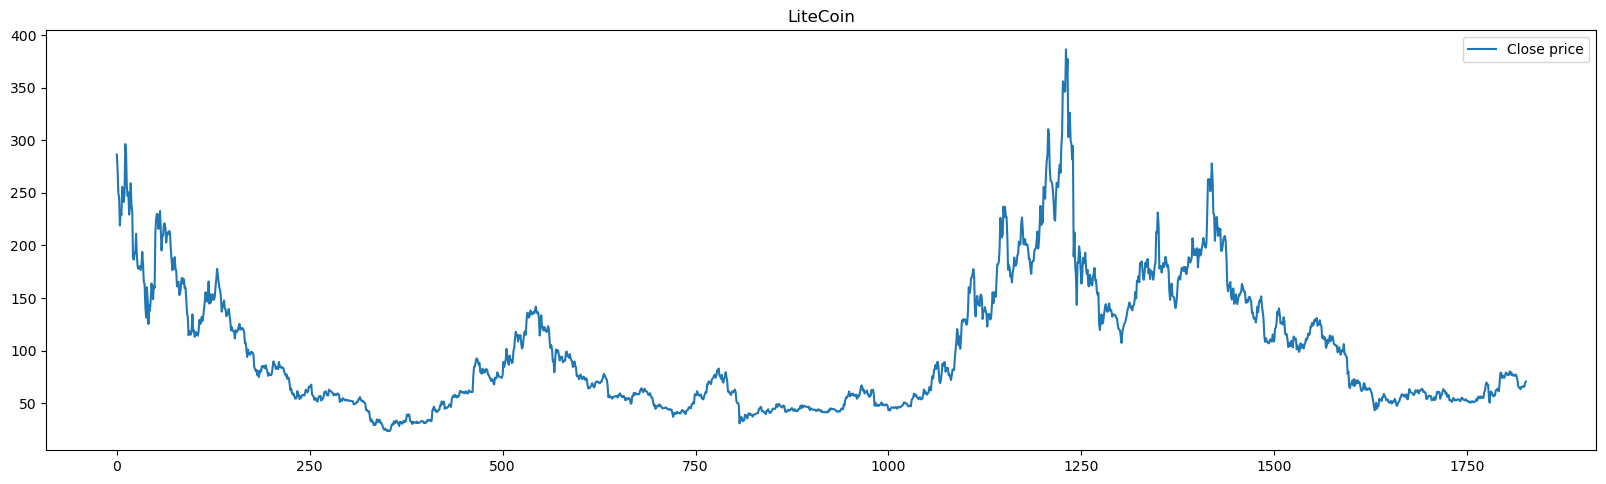

In [152]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('LiteCoin')
plt.plot(df.Close,label='Close price')
plt.legend()

## Stationarity

**Stationarity in a time-series data is a very important feature as it becomes relatively easier and statistically more accurate to apply time series methodologies on a stationary series and thus derive the business decisions. A data is said to be stationary if the mean, variance and autocorrelation structure do not show any difference over time. In other words, the data should not contain any trends or seasonality and has to show a constant variance and autocorrelation structure over time.
We will use ADF Test to acertain the stationarity of the Closing Price series.**

### Augmented Dickey-Fuller (ADF) TEST

**The Augmented Dickey-Fuller Test (ADF) is a stationarity unit root test. The null hypothesis of ADF test is that series is non-stationary. Since ADF statistic is greater than critical values, we cannot reject the null hypothesis. Hence, this imply that the series is non-stationary.**

In [150]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    ADF=adfuller(series)
    print(f'ADF Statistic is: {ADF[0]}')
    print(f'p-value is: {ADF[1]}')
    print(f'Number of lags: {ADF[2]}')
    print(f'Number of obs: {ADF[3]}')
    print(f'Critical Values: {ADF[4]}')
    if ADF[1] <= 0.05:
        print("Strong evidence against null hypothesis, so we reject null hypothesis")
    else:
        print("Weak evidence against null hypothesis implying we fail to reject null hypothesis")
        
adf_test(df['Close'])

ADF Statistic is: -2.8943761296948085
p-value is: 0.046005896467546444
Number of lags: 15
Number of obs: 1811
Critical Values: {'1%': -3.433966009459769, '5%': -2.8631372667825503, '10%': -2.567620331903232}
Strong evidence against null hypothesis, so we reject null hypothesis


### Plotting the rolling statistics against original series

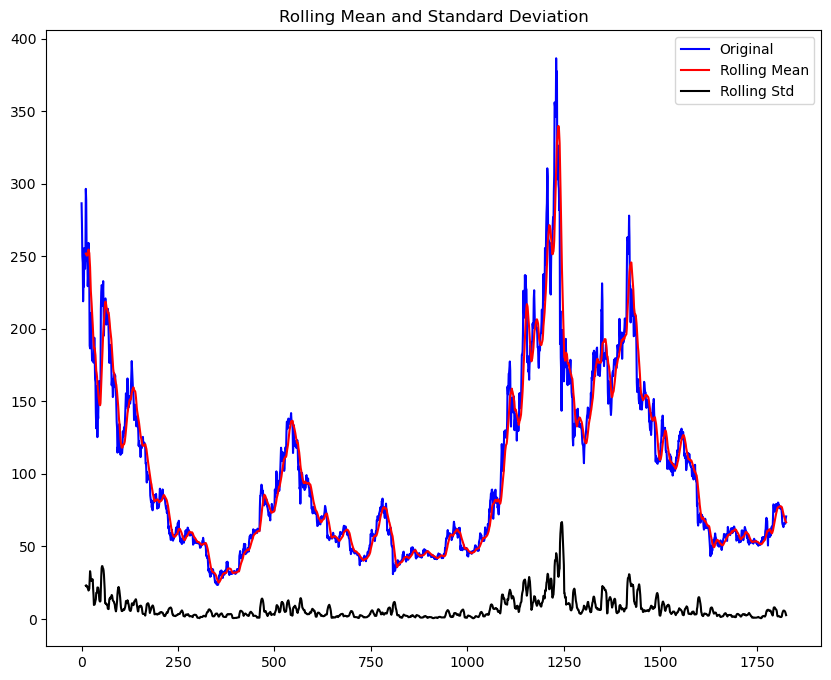

In [153]:
rolling_mean = df['Close'].rolling(12).mean()
rolling_std = df['Close'].rolling(12).std()

#Plot rolling statistics:
plt.figure(figsize=(10,8))
plt.plot(df['Close'], color='blue',label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

**Through the above graph, we can see that standard deviation is fairly constant in the series but increasing mean implies the non-stationarity of the series.**

### Tranforming the series into Stationary

**There are multiple ways of transforming the a non-stationary series into stationary:**
1. Differencing
2. Scale transformation : Using log or sqaure root of the data
3. Seasonal Decomposition

#### First Differencing

In [156]:
df['Close_FD'] = df['Close']-df['Close'].shift(1)
df['Close_FD'].isnull().sum()

1

In [157]:
df['Close_FD'] = df['Close_FD'].fillna(0)

In [158]:
adf_test(df['Close_FD'])

ADF Statistic is: -12.893133531655039
p-value is: 4.4053646512059054e-24
Number of lags: 14
Number of obs: 1812
Critical Values: {'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%': -2.567619862152732}
Strong evidence against null hypothesis, so we reject null hypothesis


<AxesSubplot:title={'center':'First Difference of Closing Price'}>

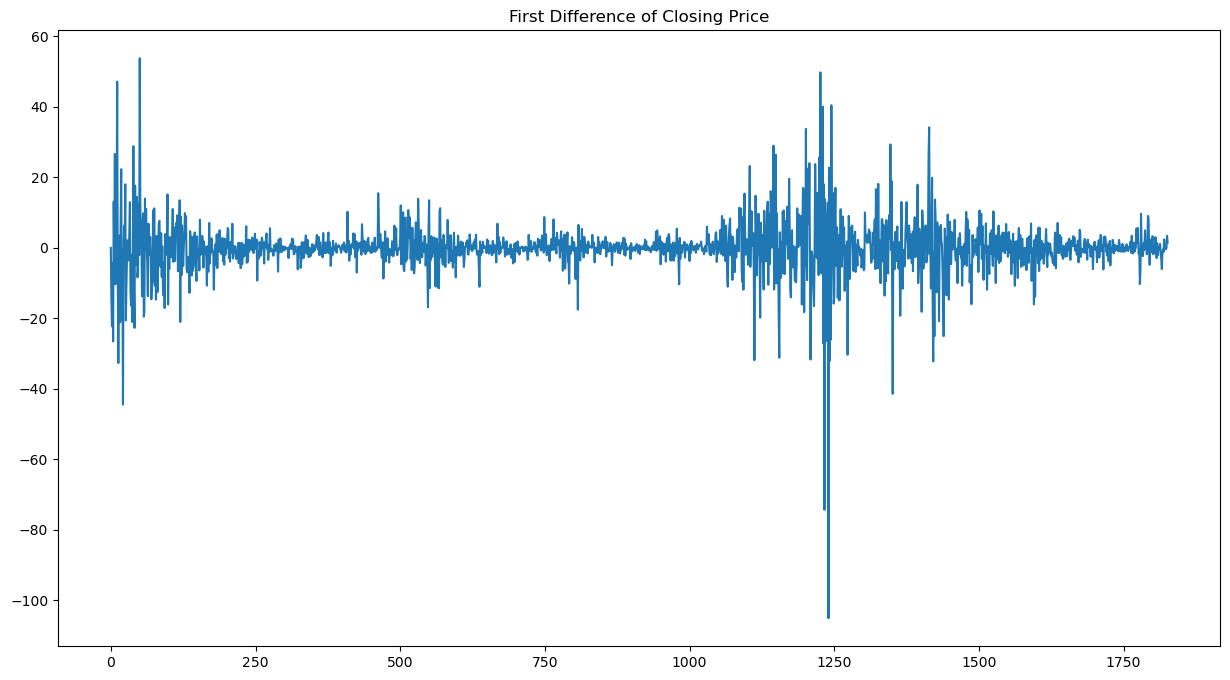

In [159]:
df['Close_FD'].plot(figsize=(15,8), title= "First Difference of Closing Price")

**After first differencing we got the stationarity in the closing price.**

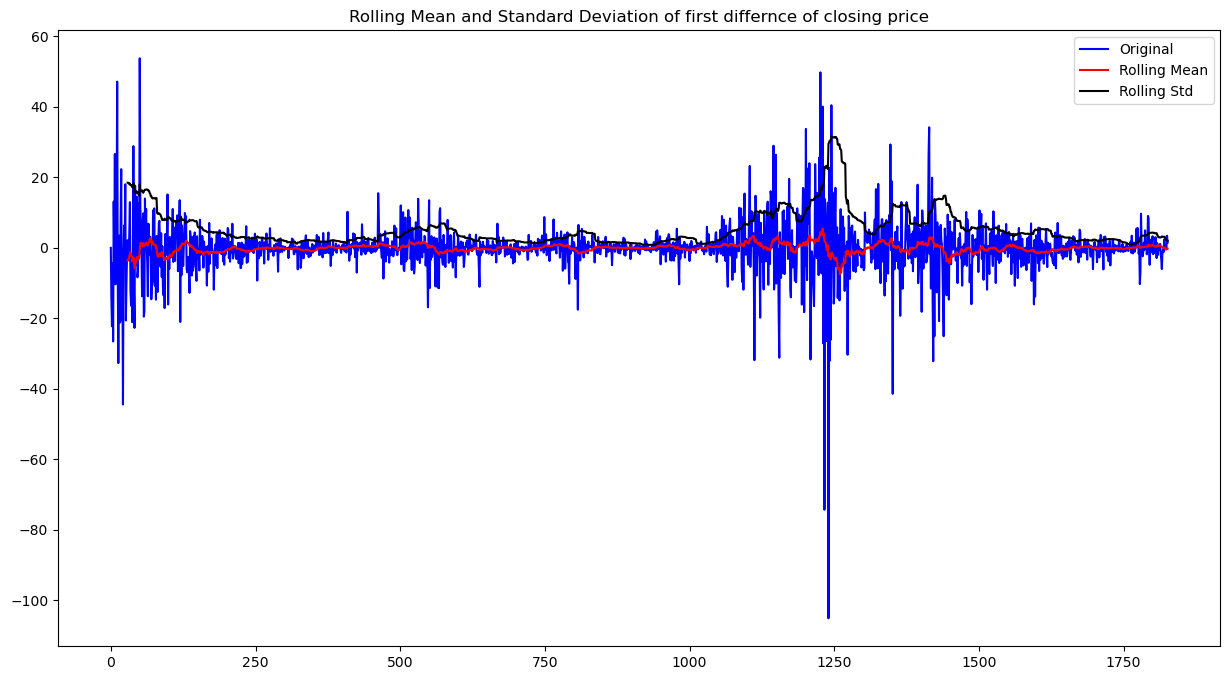

In [160]:
FDrolling_mean = df['Close_FD'].rolling(30).mean()
FDrolling_std = df['Close_FD'].rolling(30).std()

#Plot rolling statistics:
plt.figure(figsize=(15,8))
plt.plot(df['Close_FD'], color='blue',label='Original')
plt.plot(FDrolling_mean, color='red', label='Rolling Mean')
plt.plot(FDrolling_std, color='black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of first differnce of closing price')
plt.show()

**The rolling mean and standard deviation are in line with the average trend in the series.**

#### Seasonal Decomposition

**Seasoanlity is a cyclic event that occurs in time series for a short time and causes the increasing or decreasing patterns for a short time in a time series. There are two types of seasonality:**

**-Additive time series: In this, the components of the time series are added together to make the time series. Visually, the increasing or decreasing pattern of the time series is similar throughout the series.**

**-Multiplicative time series: In this, the components of the time series are multiplicative together. Visually, the time series is having exponential growth or decrement with time.**

<Figure size 640x480 with 0 Axes>

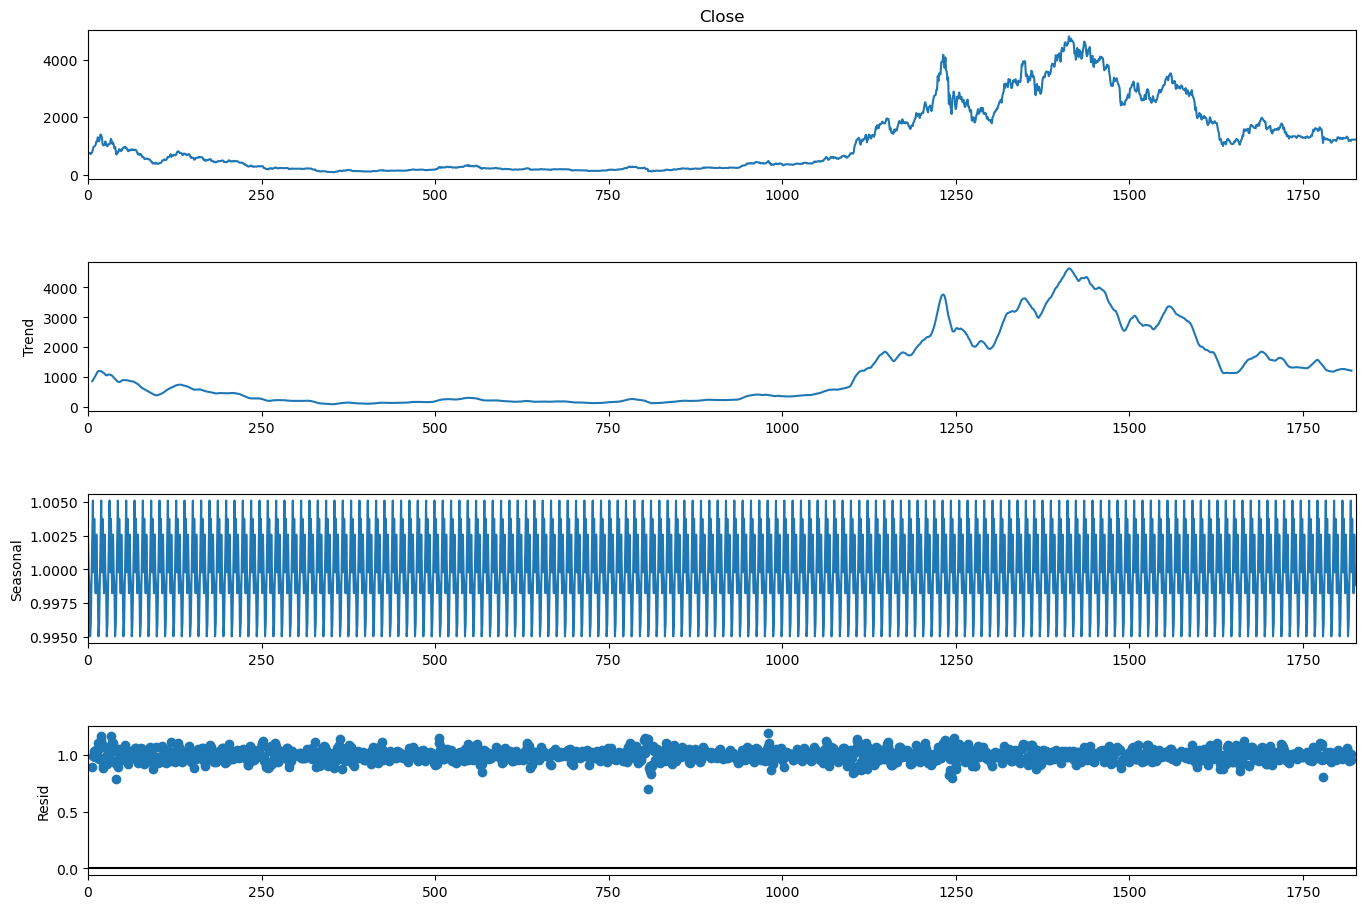

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative', period = 12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

**As we see, the data contains the seasonality which we can capture using SARIMA model.**

## ACF and PACF
**The  autocorrelation function is the amount of correlation between a variable and a lag of itself whereas the partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags.
ACF determines the order of MA part while PACF determines the AR part of the ARIMA model.**

<function matplotlib.pyplot.show(close=None, block=None)>

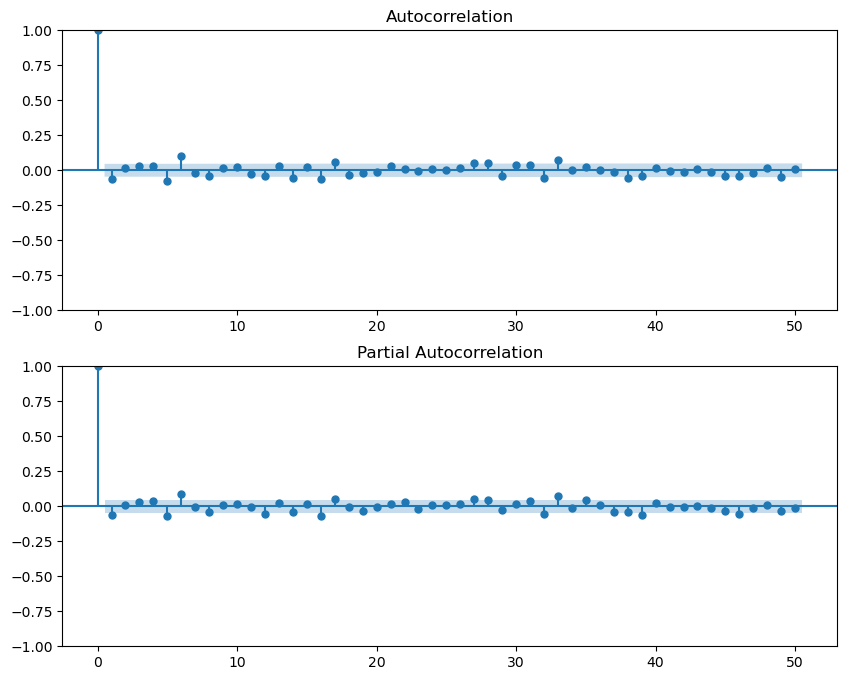

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

figure = plt.figure(figsize=(10,8))
ax1 = figure.add_subplot(2,1,1)
figure = plot_acf(df['Close_FD'], lags=50, ax=ax1)
ax2 = figure.add_subplot(2,1,2)
figure = plot_pacf(df['Close_FD'], lags=50, ax=ax2)
plt.show

**According to the ACF and PACF graphs, the ARIMA model of (5,1,2) would be the appropriate one for our analysis. However, to ascertain the parameters, we will use auto ARIMA model in the next section.**

## Training and Testing Data

In [161]:
n = int(len(df1)*0.9)
df_train = pd.DataFrame(df1[:n]).rename(columns={'Close':'y_train'})
df_test = pd.DataFrame(df1[n:]).rename(columns={'Close':'y_test'})

In [162]:
df_train

,y_train
Date,
2017-12-26,286.503998
2017-12-27,272.174011
2017-12-28,249.929993
2017-12-29,245.501999
2017-12-30,218.962997
...,...
2022-06-22,52.105392
2022-06-23,55.762833
2022-06-24,55.992283


In [163]:
df_train 

,y_train
Date,
2017-12-26,286.503998
2017-12-27,272.174011
2017-12-28,249.929993
2017-12-29,245.501999
2017-12-30,218.962997
...,...
2022-06-22,52.105392
2022-06-23,55.762833
2022-06-24,55.992283


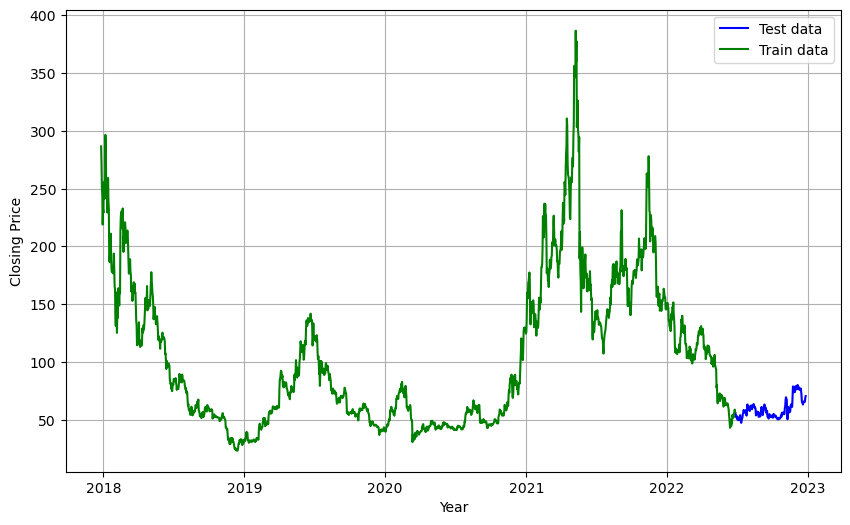

In [164]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(df_test, 'blue', label='Test data')
plt.plot(df_train, 'green', label='Train data')

plt.legend()

## SARIMA Model

### Building the Model

In [165]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pmdarima as pm

In [166]:
# auto_arima
model_fit = pm.auto_arima(df_train, test='adf', 
                         max_p=5, max_d=2, max_q=5, 
                         seasonal=True, m=12,
                         max_P=5, max_D=5, max_Q=5,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# summarize the model characteristics
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=11415.803, Time=3.23 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=18316.449, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=15364.672, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=20472.383, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=11417.010, Time=2.29 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=11416.947, Time=2.63 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=6.20 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=7.69 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=11424.749, Time=1.07 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=11419.010, Time=5.75 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=11418.896, Time=7.65 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=8.70 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=11422.006, Time=2.95 sec
 ARIMA(2,0,1)(1,0,1)[12] inte

In [167]:
import statsmodels.api as sm
import warnings


model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(2, 0, 1),
                                seasonal_order=(1, 0, 1, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1827
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -6250.008
Date:                            Wed, 04 Jan 2023   AIC                          12512.016
Time:                                    21:55:35   BIC                          12545.078
Sample:                                         0   HQIC                         12524.211
                                           - 1827                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2383      0.053      4.484      0.000       0.134       0.342
ar.L2          0.7607      0.053   

### Predictions

In [174]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
pred = model.predict(start=start,end=end)
pred

1644    56.775990
1645    56.577895
1646    53.357499
1647    52.767487
1648    53.421319
          ...    
1822    65.317570
1823    65.714296
1824    65.660815
1825    65.685877
1826    69.559317
Name: predicted_mean, Length: 183, dtype: float64

In [175]:
len(df_train)

1644

In [176]:
len(df_test)

183

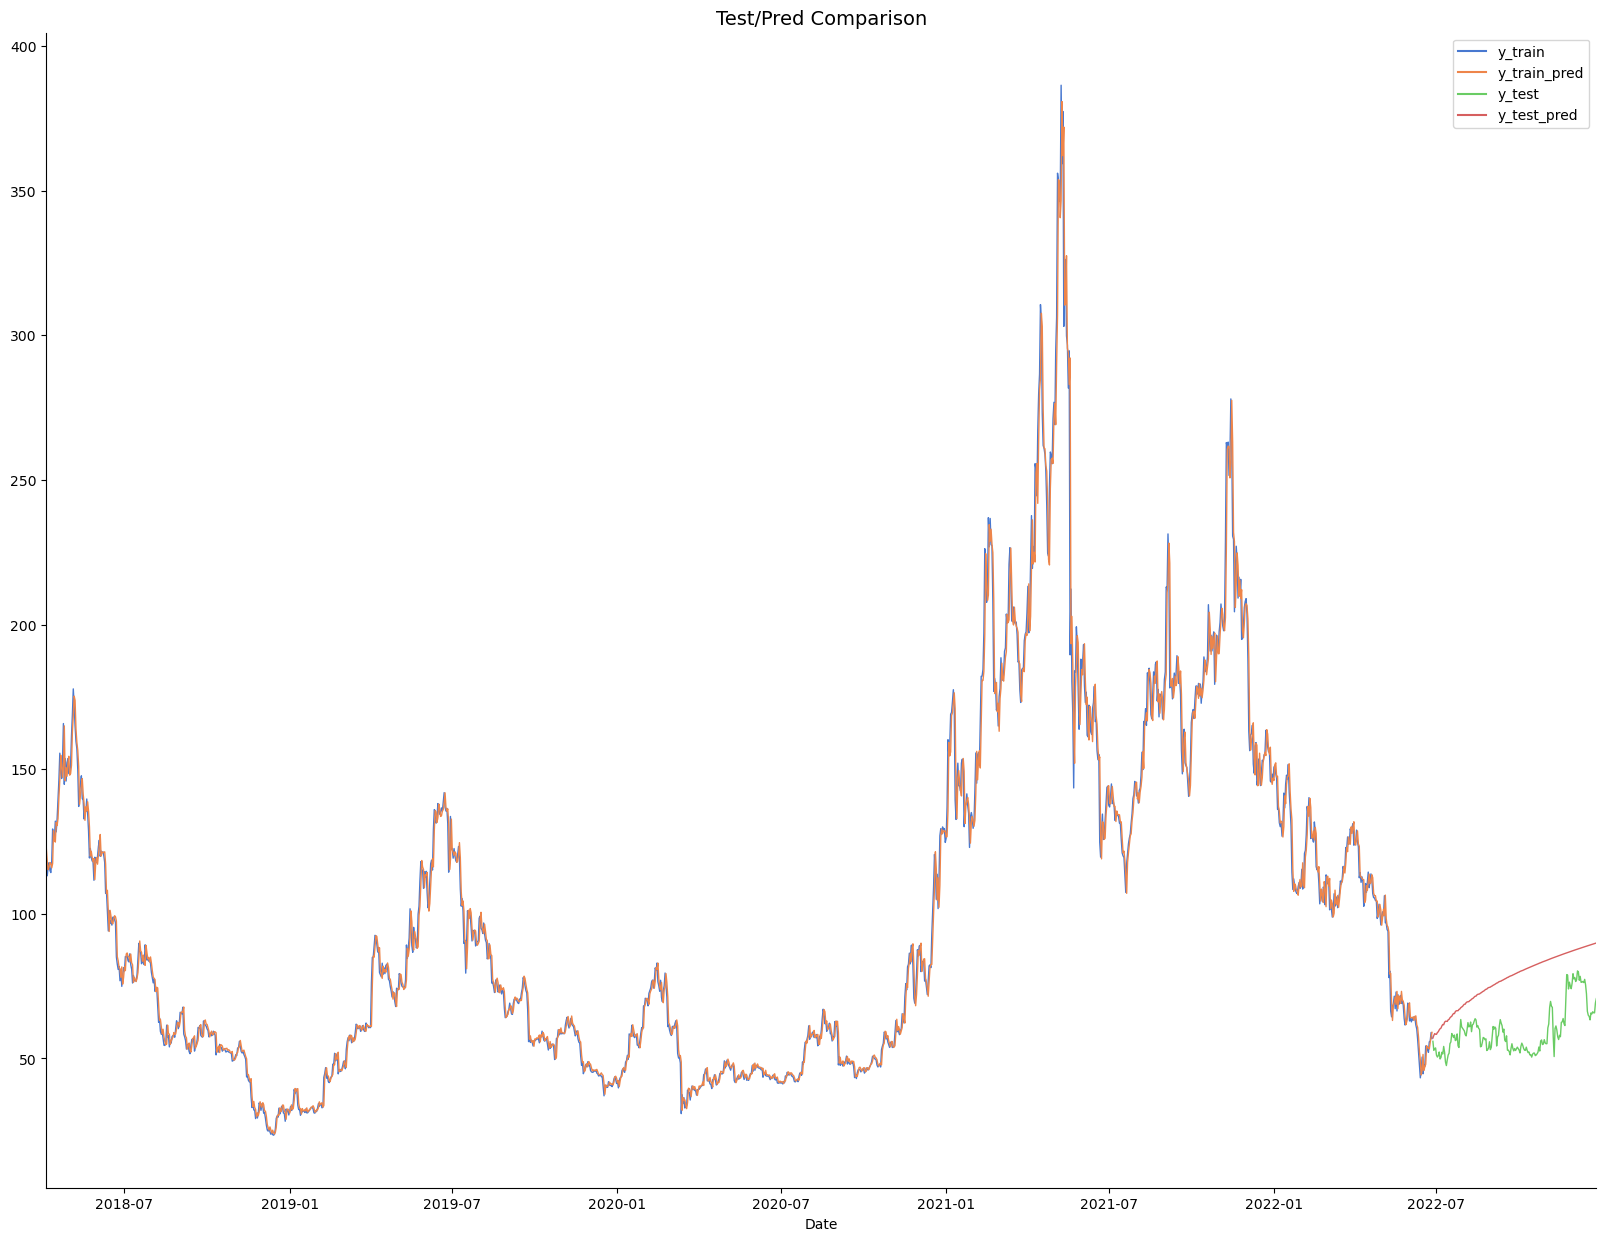

In [177]:
# Generate prediction for n periods, 
# Predictions start from the last date of the training data
pred = model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
df_train['y_train_pred'] = pred
test_pred = model_fit.predict(n_periods=n, dynamic=False)
df_test['y_test_pred'] = test_pred
df_union = pd.concat([df_train, df_test])
df_union.rename(columns={'Close':'y_test'}, inplace=True)

# Print the predicted time-series
fig, ax = plt.subplots(figsize=(20, 15))
plt.title("Test/Pred Comparison", fontsize=14)
sns.despine();
sns.lineplot(data=df_union[['y_train', 'y_train_pred', 'y_test', 'y_test_pred']], linewidth=1.0, dashes=False, palette='muted')
ax.set_xlim([df_union.index[100],df_union.index.max()])
plt.legend()

## Model Evaluation

In [178]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [179]:

mae = mae(df_test['y_test'], df_test['y_test_pred'])
print(f'MAE: {np.round(mae, 2)}')


mape = mape(df_test['y_test'], df_test['y_test_pred'])*100
print(f'MAPE: {np.round(mape, 2)} %')

RMSE = np.sqrt(mean_squared_error(df_test['y_test'], df_test['y_test_pred']))
print(f'RMSE: {np.round(RMSE, 2)}')

MAE: 17.87
MAPE: 31.13 %
RMSE: 19.64
